# Importing Library

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import splitfolders
import glob as gb
import os
from sklearn.utils import shuffle as shf
import pickle 
import cv2
import pandas as pd
import seaborn as sns
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
class config:
   

    
    data_path = 'Dataset/'
    
    path_train = "./output/train"
    path_test = "./output/test"

In [3]:
splitfolders.ratio(config.data_path, output="output", seed=101, ratio=(.9, .1))

Copying files: 1097 files [00:01, 692.19 files/s]


# Data Exploration

In [4]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = 'output/train'
test_path = 'output/val'

# Image Scaling & Processing

In [5]:
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_path,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            test_path,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')



Found 986 images belonging to 3 classes.
Found 111 images belonging to 3 classes.


# Deep Learning Model

# CNN

In [6]:
model = Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[224, 224, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               25690240  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [7]:
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator, 
                 epochs=20, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 986//32, 
                 validation_steps = 111//32, 
                 callbacks=early_stopping)

Epoch 1/20
30/30 [==============================] - 28s 935ms/step - loss: 1.5789 - accuracy: 0.5713 - val_loss: 0.5682 - val_accuracy: 0.7396
Epoch 2/20
30/30 [==============================] - 24s 806ms/step - loss: 0.3409 - accuracy: 0.8742 - val_loss: 0.1526 - val_accuracy: 0.9271
Epoch 3/20
30/30 [==============================] - 24s 806ms/step - loss: 0.1037 - accuracy: 0.9686 - val_loss: 0.0730 - val_accuracy: 0.9688
Epoch 4/20
30/30 [==============================] - 24s 806ms/step - loss: 0.0567 - accuracy: 0.9801 - val_loss: 0.0395 - val_accuracy: 0.9896
Epoch 5/20
30/30 [==============================] - 25s 836ms/step - loss: 0.0332 - accuracy: 0.9916 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 6/20
30/30 [==============================] - 24s 808ms/step - loss: 0.0131 - accuracy: 0.9937 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 7/20
30/30 [==============================] - 24s 808ms/step - loss: 0.0137 - accuracy: 0.9937 - val_loss: 0.0560 - val_accuracy: 0.9792

In [9]:
accuracy = hist.history
acc = accuracy['accuracy']                
cnn_acc = acc[9] * 100

In [10]:
model.save('cnn.h5')

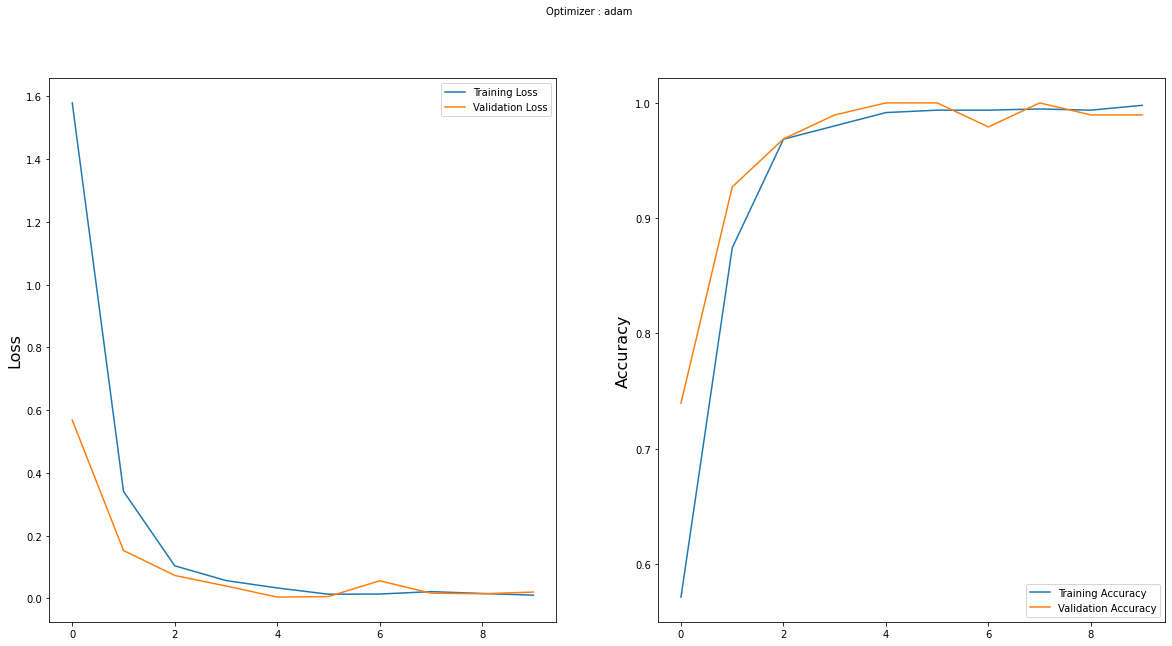

In [11]:
import matplotlib.pyplot as plt

x = hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# ANN

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Set the seed value for reproducibility
tf.random.set_seed(42)

# Create the ANN model
model = Sequential([
    Flatten(input_shape=(224, 224, 3)),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [13]:
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
hist = model.fit(train_image_generator, 
                 epochs=20, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 986//32, 
                 validation_steps = 111//32, 
                 callbacks=early_stopping)

Epoch 1/20
30/30 [==============================] - 6s 214ms/step - loss: 15.9482 - accuracy: 0.4675 - val_loss: 1.9164 - val_accuracy: 0.6354
Epoch 2/20
30/30 [==============================] - 6s 206ms/step - loss: 4.0083 - accuracy: 0.5210 - val_loss: 1.6762 - val_accuracy: 0.5729
Epoch 3/20
30/30 [==============================] - 6s 207ms/step - loss: 1.1874 - accuracy: 0.5618 - val_loss: 0.8421 - val_accuracy: 0.6354
Epoch 4/20
30/30 [==============================] - 6s 207ms/step - loss: 0.7918 - accuracy: 0.6604 - val_loss: 0.7329 - val_accuracy: 0.7708
Epoch 5/20
30/30 [==============================] - 6s 208ms/step - loss: 0.7545 - accuracy: 0.7055 - val_loss: 0.6366 - val_accuracy: 0.8021
Epoch 6/20
30/30 [==============================] - 6s 207ms/step - loss: 0.6751 - accuracy: 0.7180 - val_loss: 0.5598 - val_accuracy: 0.6875
Epoch 7/20
30/30 [==============================] - 6s 209ms/step - loss: 0.6142 - accuracy: 0.7474 - val_loss: 0.4880 - val_accuracy: 0.8438
Epoch

In [15]:
accuracy = hist.history
acc = accuracy['accuracy']                
ann_acc = acc[17] * 100

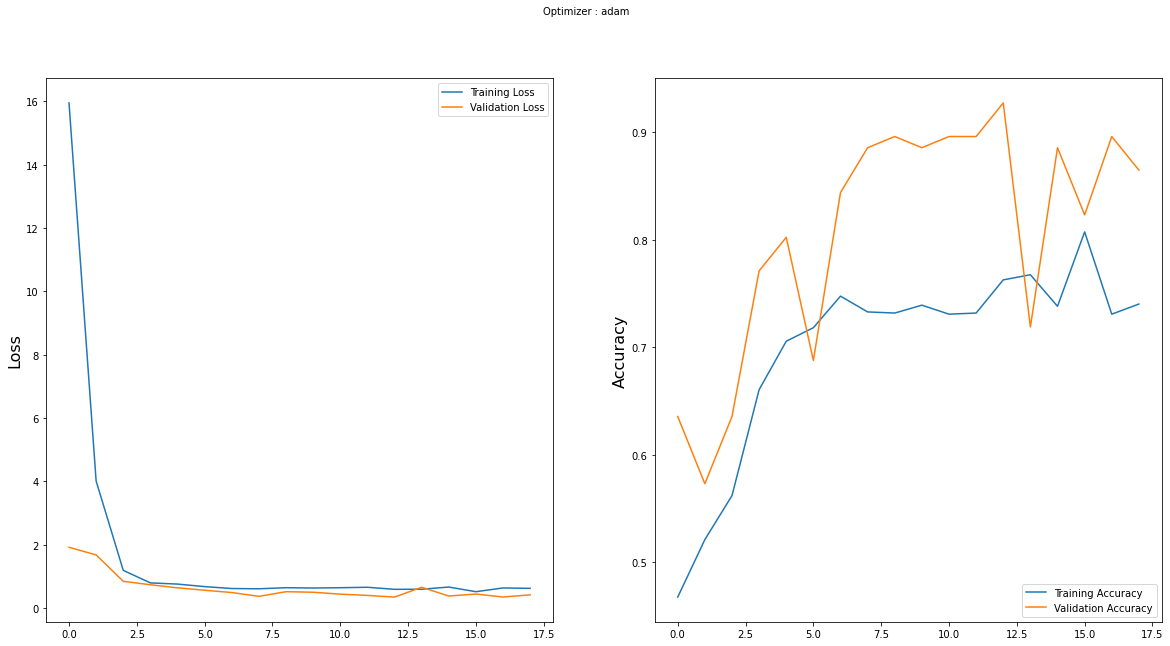

In [16]:
import matplotlib.pyplot as plt

x = hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# MobileNetv2

In [17]:
inc = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [18]:
x31 = Flatten()(inc.output)
predictionss = Dense(3, activation='softmax')(x31)

In [19]:
modelss = Model(inputs = inc.inputs, outputs = predictionss)
modelss.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [20]:
early_stopping = keras.callbacks.EarlyStopping(patience=5)
modelss.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = modelss.fit(train_image_generator, 
                 epochs=20, 
                 verbose=1, 
                 validation_data=val_image_generator, 
                 steps_per_epoch = 986//32, 
                 validation_steps = 111//32, 
                 callbacks=early_stopping)

Epoch 1/20
30/30 [==============================] - 98s 3s/step - loss: 1.0820 - accuracy: 0.7987 - val_loss: 20.0838 - val_accuracy: 0.4271
Epoch 2/20
30/30 [==============================] - 91s 3s/step - loss: 0.3085 - accuracy: 0.9004 - val_loss: 37.5369 - val_accuracy: 0.4062
Epoch 3/20
30/30 [==============================] - 91s 3s/step - loss: 0.1095 - accuracy: 0.9633 - val_loss: 38.9529 - val_accuracy: 0.3333
Epoch 4/20
30/30 [==============================] - 91s 3s/step - loss: 0.0824 - accuracy: 0.9759 - val_loss: 45.5258 - val_accuracy: 0.3854
Epoch 5/20
30/30 [==============================] - 91s 3s/step - loss: 0.1656 - accuracy: 0.9486 - val_loss: 52.6520 - val_accuracy: 0.3646
Epoch 6/20
30/30 [==============================] - 91s 3s/step - loss: 0.1176 - accuracy: 0.9570 - val_loss: 38.2299 - val_accuracy: 0.3542


In [22]:
accuracy = hist.history
acc = accuracy['accuracy']                
mob_acc = acc[5] * 100

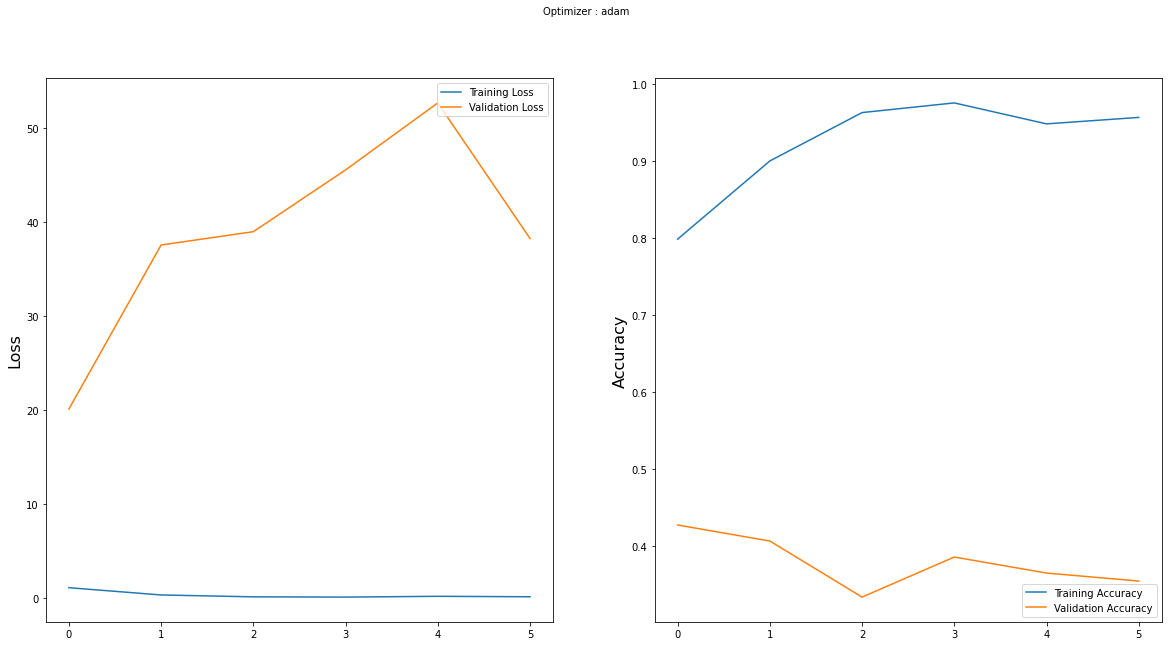

In [23]:
import matplotlib.pyplot as plt

x = hist
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Accuracy Comparison

In [25]:
results ={'Accuracy': [cnn_acc,ann_acc,mob_acc]}
index = ['CNN','ANN','MobileNet_v2']

In [26]:
results =pd.DataFrame(results,index=index)

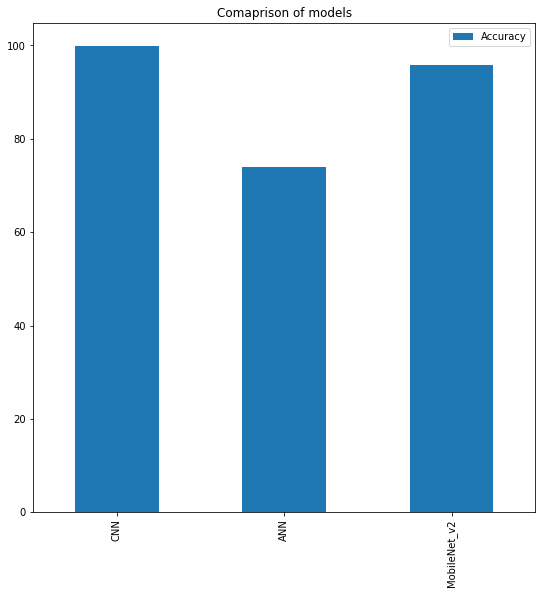

In [27]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(9,9)).get_figure()
fig.savefig('Final Result.png')